In [21]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

In [22]:
class IdentifyPeople:

    def __init__(self,capture = None) :      
        if capture is None:
            self.capture = self.start_cam()
        else:
            self.capture = capture

    def start_cam(self):
        self.capture = cv2.VideoCapture(0)
        return(self.capture)
    
    def get_frame(self):
        _,self.frame = self.capture.read()
        self.frame = cv2.flip(self.frame,1)
        return self.frame
    
    def show_frame(self,frame):
        cv2.imshow("video",frame)
        self.close_key = cv2.waitKey(50)
        return(self.close_key)
    
    def get_ai_frame(self,frame):
        _,self.camphoto = cv2.imencode('.jpg', frame)        
        self.camphoto = cv2.imdecode(self.camphoto, cv2.IMREAD_UNCHANGED)
        self.bbox ,self.labels ,self.conf = cv.detect_common_objects(self.camphoto)
        return(self.camphoto, self.bbox, self.labels ,self.conf)

    def draw_ai_frame(self,camphoto, bbox, labels, conf):
        self.im2 = draw_bbox(camphoto,bbox,labels,conf)
        print(labels)
        plt.imshow(self.im2[:,:,::-1])
        plt.show()

    def close_cam(self):
        self.capture.release() 
        cv2.destroyAllWindows()
        
        print("End")
        

In [23]:
def main():
        
    t = 0
    identify_people = IdentifyPeople()
    while True:

        frame = identify_people.get_frame()
        close_key = identify_people.show_frame(frame)

        t = t + 1
        
        
        if t > 20:
            t = 0
            camphoto, bbox, labels ,conf = identify_people.get_ai_frame(frame)
            identify_people.draw_ai_frame(camphoto, bbox, labels, conf)
        
        if close_key == 27:
            identify_people.close_cam()

            return


['person', 'person', 'tv']


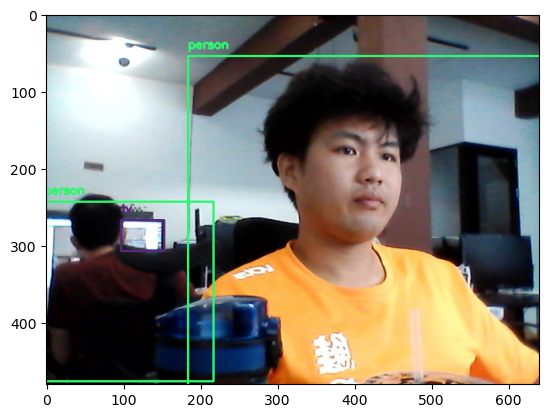

['person', 'person', 'tv']


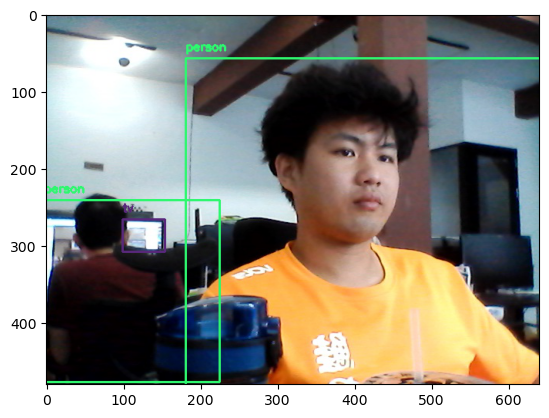

['person', 'person']


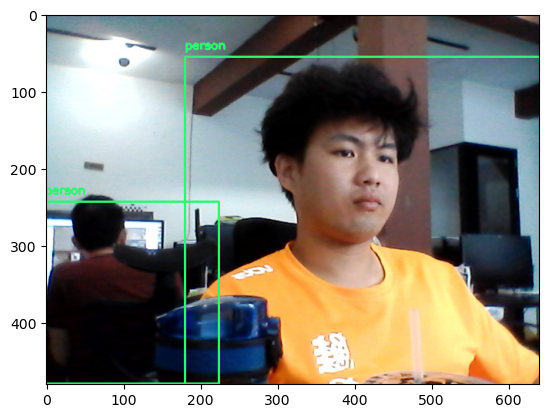

['person', 'person', 'tv']


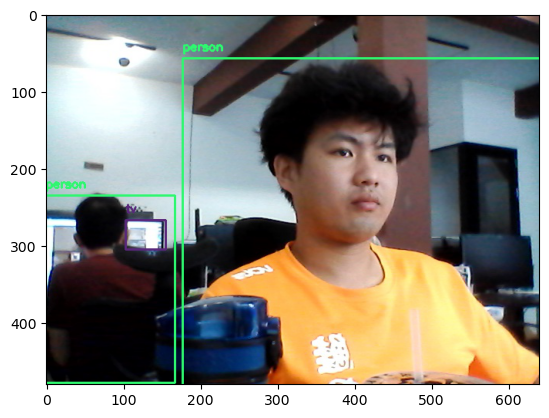

['person', 'person', 'tv']


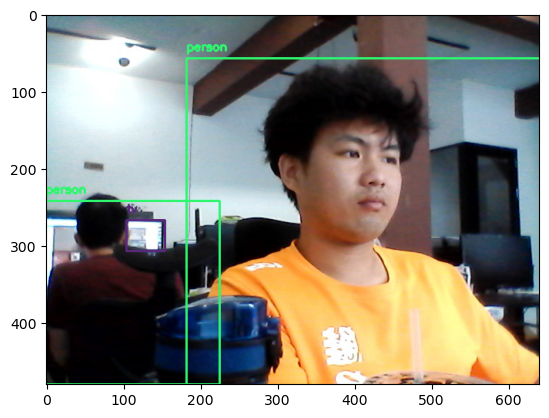

End


In [24]:
main()